## Amazon Product Reviews

About Dataset

Context

This dataset contains more than 568k consumer reviews on different amazon products. This dataset is also available on other dataset related sites, but I found it useful and shared it here

In [2]:
import pandas as pd
import numpy as np
import nltk
from textblob import TextBlob
nltk.download('punkt')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tatia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data = pd.read_csv("hw_reviews.csv")
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
data1 = data.iloc[:300000, :]
data2 = data.iloc[300000:, :]
data1.tail()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
299995,299996,B000VA5LZI,A26HE0NT48NQZA,S. Parent,0,0,3,1250208000,Not exactly kettlecorn!,"The price was excellent for this product, howe..."
299996,299997,B000VA5LZI,AE6YV1KF6UKJR,Rhonda Davis,1,4,2,1197590400,ok,not the best ... too many small pieces and no ...
299997,299998,B000VA5LZI,A3NRNASNTU5TFI,Lemmy,2,43,5,1194739200,I am the sandwich of night,"Dude! DUDE! Dude? Hey dude, wake up, man!<br /..."
299998,299999,B0007XAUXC,AYRFQU12QD60L,D. Rosselli,12,12,5,1111708800,artofappreciation website,I ordered and sent this item as a gift the Art...
299999,300000,B0007XAUXC,A1TDZMXV5P6AJB,Phyllis E. Tustin,7,7,4,1272758400,review,our grand kids were thrilled and excited. they...


In [6]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
300000,300001,B0007XAUXC,A2IVZ6LY3YHV1N,"Kimberly J. Walsh ""Military Mom""",0,0,5,1345680000,daughter loved it,I sent this to my daughter for Easter. She has...
300001,300002,B0007XAUXC,A1KBRU7S92I6FC,tammy,0,0,5,1336608000,Very happy,I sent this as a gift to my daughter away at c...
300002,300003,B0007XAUXC,A1VTCSCH8FFC76,Parker Hallam,0,0,5,1334188800,Best Easter gift,This Easter I found a great gift item for my n...
300003,300004,B000V1ECO8,A22O5OB5CZ23HV,Savvy Shopper,1,1,5,1326499200,Why Settle For Less Than The Best?,"In the past, I had tried to prepare other bran..."
300004,300005,B000V1ECO8,AL0VVZPCAWZLX,Sylvia Alexander,1,1,5,1285372800,Outstanding,I'm 100% Italian and in the past always used t...


In [7]:
def rule_based_labeling(row):
    if row["Score"] >= 4:
        return "positive"
    elif row["Score"] == 3:
        return 'neutral'
    else:
        return "negative"

In [8]:
data1["Label"] = data1.apply(rule_based_labeling, axis=1)
data1.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


<AxesSubplot: >

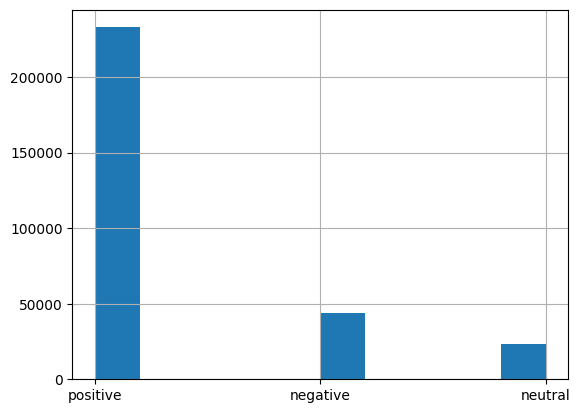

In [9]:
data1["Label"].hist()

In [10]:
def get_sentiment(row):
    blob = TextBlob(row)
    return blob.sentiment.polarity

In [14]:
data2['sentiment'] = data2['Text'].apply(get_sentiment)

In [15]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment
300000,300001,B0007XAUXC,A2IVZ6LY3YHV1N,"Kimberly J. Walsh ""Military Mom""",0,0,5,1345680000,daughter loved it,I sent this to my daughter for Easter. She has...,0.250000
300001,300002,B0007XAUXC,A1KBRU7S92I6FC,tammy,0,0,5,1336608000,Very happy,I sent this as a gift to my daughter away at c...,0.608333
300002,300003,B0007XAUXC,A1VTCSCH8FFC76,Parker Hallam,0,0,5,1334188800,Best Easter gift,This Easter I found a great gift item for my n...,0.346627
300003,300004,B000V1ECO8,A22O5OB5CZ23HV,Savvy Shopper,1,1,5,1326499200,Why Settle For Less Than The Best?,"In the past, I had tried to prepare other bran...",0.088283
300004,300005,B000V1ECO8,AL0VVZPCAWZLX,Sylvia Alexander,1,1,5,1285372800,Outstanding,I'm 100% Italian and in the past always used t...,-0.100000


In [16]:
def get_sentiment_label(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

In [17]:
data2['Label'] = data2['sentiment'].apply(get_sentiment_label)

In [18]:
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,sentiment,Label
300000,300001,B0007XAUXC,A2IVZ6LY3YHV1N,"Kimberly J. Walsh ""Military Mom""",0,0,5,1345680000,daughter loved it,I sent this to my daughter for Easter. She has...,0.250000,positive
300001,300002,B0007XAUXC,A1KBRU7S92I6FC,tammy,0,0,5,1336608000,Very happy,I sent this as a gift to my daughter away at c...,0.608333,positive
300002,300003,B0007XAUXC,A1VTCSCH8FFC76,Parker Hallam,0,0,5,1334188800,Best Easter gift,This Easter I found a great gift item for my n...,0.346627,positive
300003,300004,B000V1ECO8,A22O5OB5CZ23HV,Savvy Shopper,1,1,5,1326499200,Why Settle For Less Than The Best?,"In the past, I had tried to prepare other bran...",0.088283,positive
300004,300005,B000V1ECO8,AL0VVZPCAWZLX,Sylvia Alexander,1,1,5,1285372800,Outstanding,I'm 100% Italian and in the past always used t...,-0.100000,negative


<AxesSubplot: >

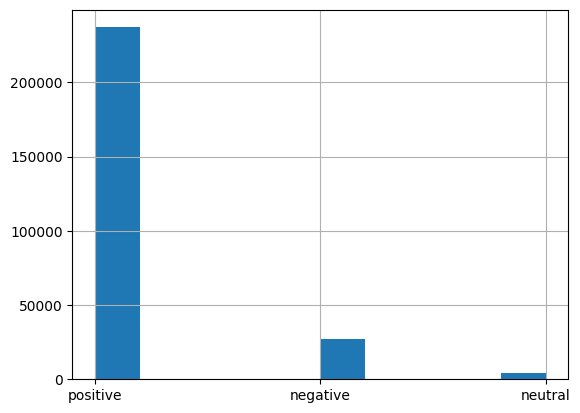

In [19]:
data2["Label"].hist()

In [20]:
data2.drop('sentiment', axis=1, inplace=True)
data2.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
300000,300001,B0007XAUXC,A2IVZ6LY3YHV1N,"Kimberly J. Walsh ""Military Mom""",0,0,5,1345680000,daughter loved it,I sent this to my daughter for Easter. She has...,positive
300001,300002,B0007XAUXC,A1KBRU7S92I6FC,tammy,0,0,5,1336608000,Very happy,I sent this as a gift to my daughter away at c...,positive
300002,300003,B0007XAUXC,A1VTCSCH8FFC76,Parker Hallam,0,0,5,1334188800,Best Easter gift,This Easter I found a great gift item for my n...,positive
300003,300004,B000V1ECO8,A22O5OB5CZ23HV,Savvy Shopper,1,1,5,1326499200,Why Settle For Less Than The Best?,"In the past, I had tried to prepare other bran...",positive
300004,300005,B000V1ECO8,AL0VVZPCAWZLX,Sylvia Alexander,1,1,5,1285372800,Outstanding,I'm 100% Italian and in the past always used t...,negative


In [28]:
data = pd.concat([data1, data2])

In [24]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,positive


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
 10  Label                   568454 non-null  object
dtypes: int64(5), object(6)
memory usage: 47.7+ MB


In [29]:
data['Label'] = data['Label'].replace({'neutral': 'negative'})

In [30]:
data['Label'].unique()

array(['positive', 'negative'], dtype=object)

<AxesSubplot: >

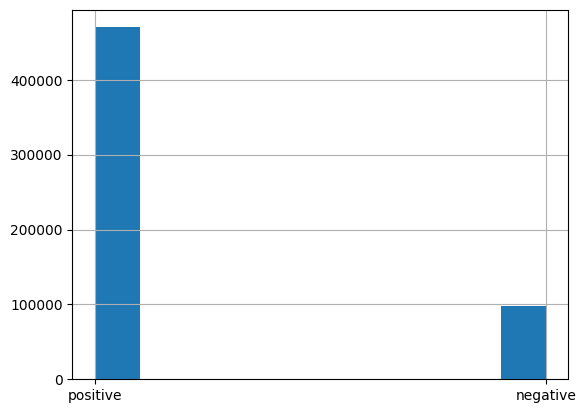

In [31]:
data["Label"].hist()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [33]:
data['Label'] = data['Label'].replace({'negative': 0, 'positive': 1})

In [34]:
labeled_data, unlabeled_data = train_test_split(data, train_size=0.2, random_state=42)

In [35]:
# Определение функции для обучения модели логистической регрессии на размеченных данных
def train_model(labeled_data):
    # Векторизация текстовых данных с помощью TF-IDF
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_data['Text'])
    y = labeled_data['Label']

    # Обучение модели логистической регрессии на размеченных данных
    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [36]:
# Обучение начальной модели на небольшом наборе 
model, vectorizer = train_model(labeled_data)

C:\Users\tatia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
X_unlabeled = vectorizer.transform(unlabeled_data['Text'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [38]:
# Вычислить неопределенности или энтропии предсказаний
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [44]:
uncertainty

array([0.11517404, 0.09024668, 0.99900109, ..., 0.18898755, 0.11014337,
       0.09278485])

In [40]:
# Выбор 100 наиболее неопределенных точек данных для маркировки человеком
labeled_data_new = unlabeled_data.iloc[uncertainty.argsort()[:100]]
unlabeled_data_new = unlabeled_data.iloc[uncertainty.argsort()[100:]]

In [41]:
# Разметка новых точек данных и добавление их к размеченному множеству
labeled_data = pd.concat([labeled_data, labeled_data_new])

In [45]:
labeled_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
87155,87156,B000FGCA16,AMTZX4IY5QZQA,John,0,0,1,1350691200,Deceptive Labeling,I don't have to eat these to know it isn't goo...,0
499483,499484,B000CQID6U,A2FYGOBWZ4BIKR,M. Bennett,0,0,5,1313971200,Better price than the grocery store,I buy my office supplies from Amazon.com. When...,1
54023,54024,B0052T71H4,A3BH49ZKESHDID,Fred Camfield,1,1,1,1314921600,Not recommended,This could be better labeled chicken and dumpl...,0
424195,424196,B000MGOZEO,A128AAEK8YN0LE,SpinDance,10,12,5,1190160000,Great in homemade cocoa mix,Good stuff. I use it in my homemade cocoa mix...,1
475254,475255,B001H0FI0O,AMNPFW5GRHCM9,Nick,1,1,5,1275350400,"great product, rip off price",This is probably my favorite of the Dolce Gust...,1
...,...,...,...,...,...,...,...,...,...,...,...
469317,469318,B001E5E24A,AW6B1H0YMHRA8,R. Durham,1,1,5,1320278400,Love in a jar! &lt;3,"We love this so much! Great for hot or iced, ...",1
40700,40701,B001YJ8FUI,A18AB9ZJASYPRS,D. Garrett,2,2,5,1337644800,what a way to start your day!,Really moist and delicious and convenient--a s...,1
513122,513123,B004LLAYA0,A16UEACSB86961,"S. S. Radimer Collectibles ""ECLECTIC SELLER""",2,2,4,1315094400,EkoJava,"Very convenient, easy to use and delicious. M...",1
78782,78783,B0031UBVX6,A1HJGYIHKGI7GD,Ang,0,0,5,1325894400,"quick, easy and delicious!!",So good. My kids and I both loved it. It's abs...,1


In [42]:
# Переобучение модели на расширенном маркированном множестве
model, vectorizer = train_model(labeled_data)

C:\Users\tatia\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
data_test = unlabeled_data
data_test

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Label
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,1
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,1
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,0
433954,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",1
70260,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,1
...,...,...,...,...,...,...,...,...,...,...,...
469423,469424,B002HT2CU8,A6LDXVSB1749S,iyr,0,10,1,1322265600,almost put me in the hospital,When it first came out it was good but they re...,1
77144,77145,B001OCKIP0,A1C05TSWTI3VZ5,"Derrick ""Vitamin D""",0,0,4,1243641600,Great taste of Granola and chocolate but can b...,Going on taste alone I would rate it 5 stars. ...,1
128385,128386,B00117YUH0,ASXW8WAEKC2LN,Ronald Fernandez,0,0,5,1268006400,Great Product!!!,I love the burst of energy that I get and I on...,1
96095,96096,B000FU2E9U,A2TXJEPQ7TF17D,"Marie J. Evans ""clawhammer55""",2,2,5,1237507200,Husband is Very Happy,My husband couldn't find any place in our area...,1


In [48]:
# Оценка модели на тестовом датасете
X_test = vectorizer.transform(data_test['Text'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(data_test['Label'], y_test_predicted)

print(f1)

0.930019118501437
